In [1]:
# In this project we will look at Naitrobi housing data retrieved from Kaggle. univariate, bivariate,
#  and multivariate analyses will be perfomred on differemt features of the dataset to understand, how they influence the price of hosues

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# load csv file into dataframes\
file = r"C:/Users\Mindah Roche\Desktop\rent_apts.csv"
df = pd.read_csv(file)
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [3]:
# inspecting the dataframe using head, shape, and info in pandas
df.info()
df.shape
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency        1848 non-null   object 
 1   Neighborhood  1848 non-null   object 
 2   Price         1848 non-null   object 
 3   link          1848 non-null   object 
 4   sq_mtrs       1846 non-null   float64
 5   Bedrooms      1845 non-null   float64
 6   Bathrooms     1557 non-null   float64
dtypes: float64(3), object(4)
memory usage: 101.2+ KB


,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [4]:
# drop null values
df.dropna(inplace=True)

In [5]:
# verify characters to clean in "Price column"
df["Price"] 

0       KSh 155,000
1       KSh 100,000
2        KSh 75,000
3       KSh 135,000
6       KSh 100,000
           ...     
1841    KSh 180,000
1842    KSh 180,000
1844    KSh 180,000
1845    KSh 180,000
1846    KSh 180,000
Name: Price, Length: 1557, dtype: object

In [6]:
# cleaning Price column
df["Price"] = df["Price"].str.replace("KSh", "", regex=False).str.replace(",", "").astype(float)
df.head(5)

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands",155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North",100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North",135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
6,Mambo Properties Enterprise,"Off Denis Pritt, Kilimani, Dagoretti North",100000.0,/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0


In [7]:
# clean Neighborhood column
# Fill null entries in the column to allow for column split
df["Neighborhood"].fillna("", inplace =True)
df["Neighborhood"] = df["Neighborhood"].str.split(",", expand=True)[0]
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,General Mathenge,155000.0,/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,Kilimani,100000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,Hatheru Rd,75000.0,/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,Kilimani,135000.0,/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
6,Mambo Properties Enterprise,Off Denis Pritt,100000.0,/listings/2-bedroom-apartment-for-rent-kiliman...,14.0,2.0,3.0


In [8]:
# drop link column
df.drop(columns=["link"])

,Agency,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,General Mathenge,155000.0,4.0,4.0,4.0
1,Kenya Classic Homes,Kilimani,100000.0,300.0,3.0,4.0
2,Absolute Estate Agents,Hatheru Rd,75000.0,3.0,3.0,5.0
3,A1 Properties Limited,Kilimani,135000.0,227.0,3.0,4.0
6,Mambo Properties Enterprise,Off Denis Pritt,100000.0,14.0,2.0,3.0
...,...,...,...,...,...,...
1841,Origin Homes,Brookside Drie,180000.0,3.0,3.0,3.0
1842,Origin Homes,Brookside,180000.0,3.0,3.0,4.0
1844,Dmus Realtors,Peponi road,180000.0,2.0,2.0,2.0
1845,A1 Properties Limited,Kileleshwa,180000.0,4.0,4.0,5.0


In [9]:
# Performing Univariate Analysis: Understanding Individual Features
# What is the distribution of property prices? Are they skewed? Are there outliers?
df[["sq_mtrs", "Price"]].describe()

,sq_mtrs,Price
count,1557.000000,1557.000000
mean,375.826590,98339.751445
std,2220.517532,40175.785665
min,0.000000,12000.000000
25%,2.000000,70000.000000
50%,3.000000,95000.000000
75%,13.000000,130000.000000
max,40470.000000,240000.000000


In [11]:
# # Key Observations
# The "sq_mtrs" column has potential data issues:

# The minimum (0 sq. meters) is likely an error.
# The mean (375.83) is very different from the quartiles (2, 3, 13), suggesting extreme outliers or incorrect units.
# Property sizes are extremely varied (standard deviation of 2,220), suggesting some properties may be misclassified (e.g., land areas vs. built areas).

# Most properties have 2-3 bedrooms and 2-3 bathrooms. Only a few have 6.

# Prices range from KSs12,000 to Ksh240,000, with a median of Ksh95,000.

In [12]:
# Categorizing data  number of houses per Neighborhood and identifying the top 10 neighborhoods with the most houses
df["Neighborhood"].value_counts().head(10)

Kilimani            128
Westlands Area       87
Kileleshwa           77
Lavington            75
kilimani             57
Rhapta Road          52
Riverside            45
General Mathenge     39
Parklands            27
Brookside            25
Name: Neighborhood, dtype: int64

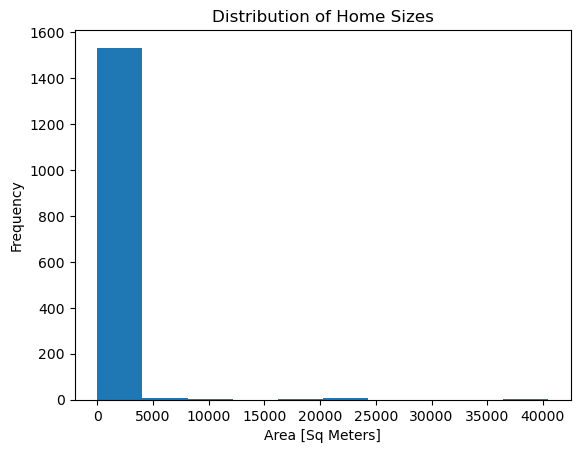

In [13]:
# Visualizing the distribution of property by size
plt.hist(df["sq_mtrs"])
# x axis label
plt.xlabel("Area [Sq Meters]")
# ylabel
plt.ylabel("Frequency")
# title 
plt.title("Distribution of Home Sizes");


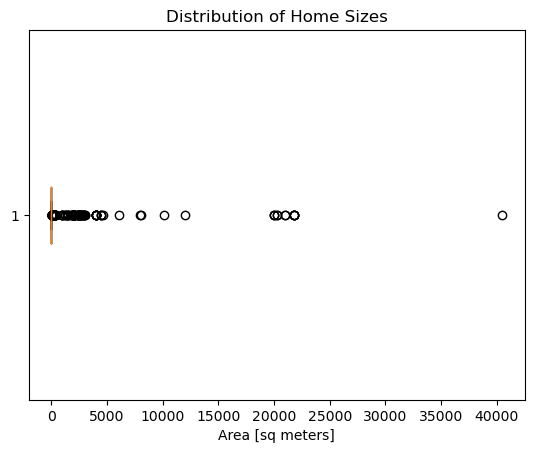

In [14]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["sq_mtrs"], vert=False)

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

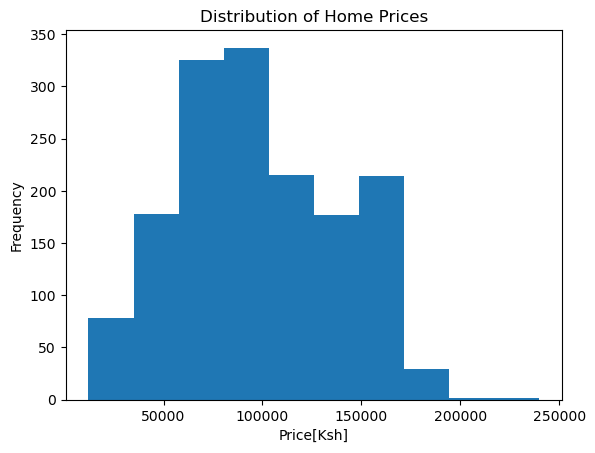

In [15]:
# Creating Histogram of Price
plt.hist(df["Price"])
# Xlabel
plt.xlabel("Price[Ksh]")
# ylable
plt.ylabel("Frequency")
# title
plt.title("Distribution of Home Prices");

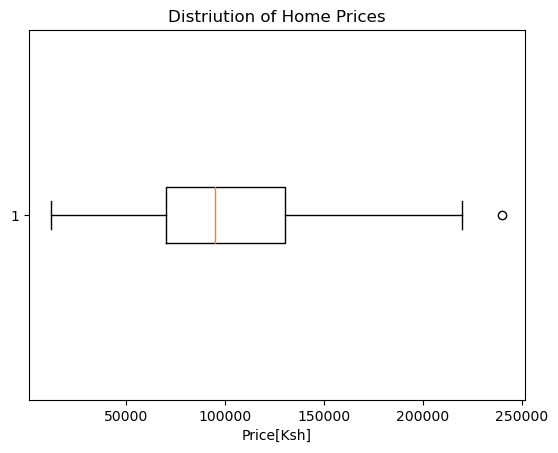

In [16]:
# Creating boxplot of Price
plt.boxplot(df["Price"], vert=False)
# x axis label
plt.xlabel("Price[Ksh]")
# Title
plt.title("Distriution of Home Prices");

In [17]:
# what is the most expensive neighborhood by price?
mean_price_by_neighborhood = df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
mean_price_by_neighborhood.head(10)

Neighborhood
Kiambere Road                   240000.0
Brookside Drie                  180000.0
Peponi road                     180000.0
riverside drive                 180000.0
Mwanzi road                     180000.0
Riverside Grove                 175000.0
Donyo Sabuk Avenue              175000.0
                                170000.0
Amrutha Brookside Dr Nairobi    170000.0
Arwings Kodhek                  170000.0
Name: Price, dtype: float64

In [18]:
# What is the least expensive neighbourhood?
mean_price_by_neighborhood = df.groupby("Neighborhood")["Price"].mean().sort_values(ascending=False)
mean_price_by_neighborhood.tail(10)

Neighborhood
Along Kikuyu Road         16000.0
MUCHATHA- NATIONAL OIL    16000.0
Seasons                   16000.0
Kahigu Road-Ruaka         16000.0
Zimmerman                 15000.0
Uthiru 87                 15000.0
SHULE                     14000.0
fisharies                 13000.0
MUIRU                     13000.0
nyali road                12000.0
Name: Price, dtype: float64

In [19]:
# Comparing house prices by different agencies for same neighborhoods
mean_house_price_agency = df.groupby(["Agency", "Neighborhood"])["Price"].mean().sort_values(ascending=False)
mean_house_price_agency.head(10)

Agency                        Neighborhood   
Serene Valley Apartments      Kiambere Road      240000.0
Yellow Market                 Riverside Drive    220000.0
Westside Real Estate          Muringa Road       200000.0
City Homes Kenya Real Estate  Mwanzi road        180000.0
Origin Homes                  Brookside          180000.0
Dmus Realtors                 Peponi road        180000.0
Green Knight Properties       riverside drive    180000.0
Simkar Group Limited          Kilimani           180000.0
Ring Kenya Ltd                Upper Hill         180000.0
Coralinternational Ltd        Wood Avenue        180000.0
Name: Price, dtype: float64

In [20]:
# Agency with most property listing
Number_of_houses_by_agency = df["Agency"].value_counts()
Number_of_houses_by_agency 

Prudential Green Ville         98
Wealthlink Realtors Ltd        67
Buy Rent Shelters              57
Mambo Properties Enterprise    51
Pam Golding Properties         48
                               ..
Njambi Warui                    1
Gimco Limited                   1
Kingslink Ventures              1
Miamu Properties Limited        1
Gerryville Homes                1
Name: Agency, Length: 180, dtype: int64

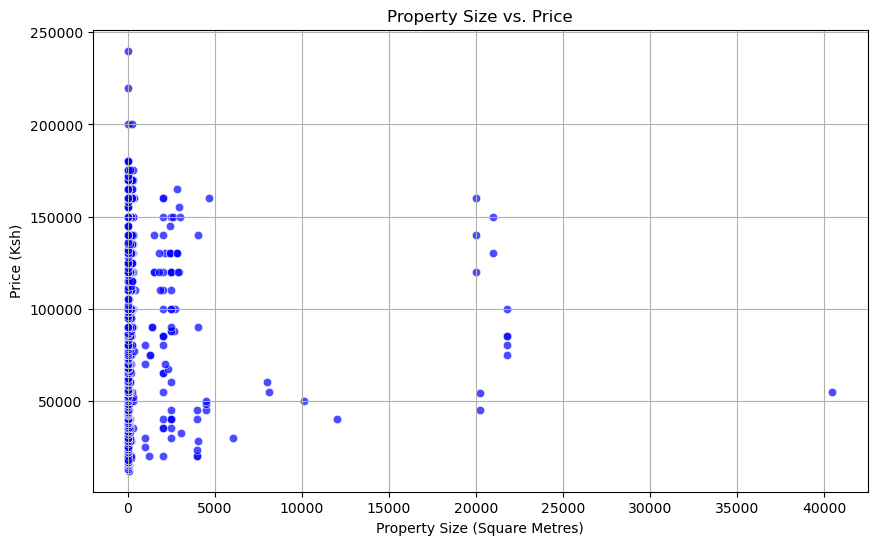

In [21]:
# relationship between proterty size and price using scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sq_mtrs", y="Price", alpha=0.7, color="blue")

plt.xlabel("Property Size (Square Metres)")
plt.ylabel("Price (Ksh)")
plt.title("Property Size vs. Price")
plt.grid(True)
plt.show()



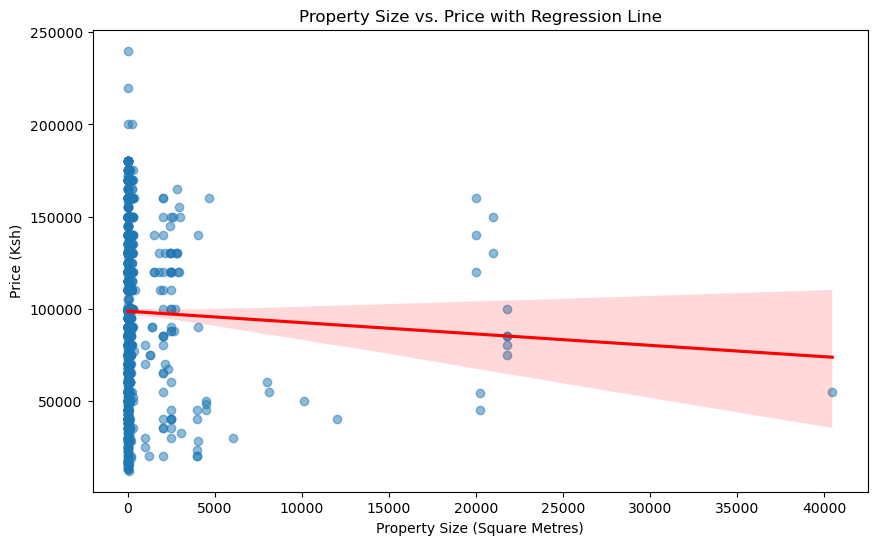

In [22]:
 # relationship between proterty size and price using regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="sq_mtrs", y="Price", scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Property Size (Square Metres)")
plt.ylabel("Price (Ksh)")
plt.title("Property Size vs. Price with Regression Line")
plt.show()


In [23]:
#  relationship between proterty size and price using correlation coefficient
correlation = df["sq_mtrs"].corr(df["Price"])
print(f"Correlation between Property Size and Price: {correlation:.2f}")


Correlation between Property Size and Price: -0.03


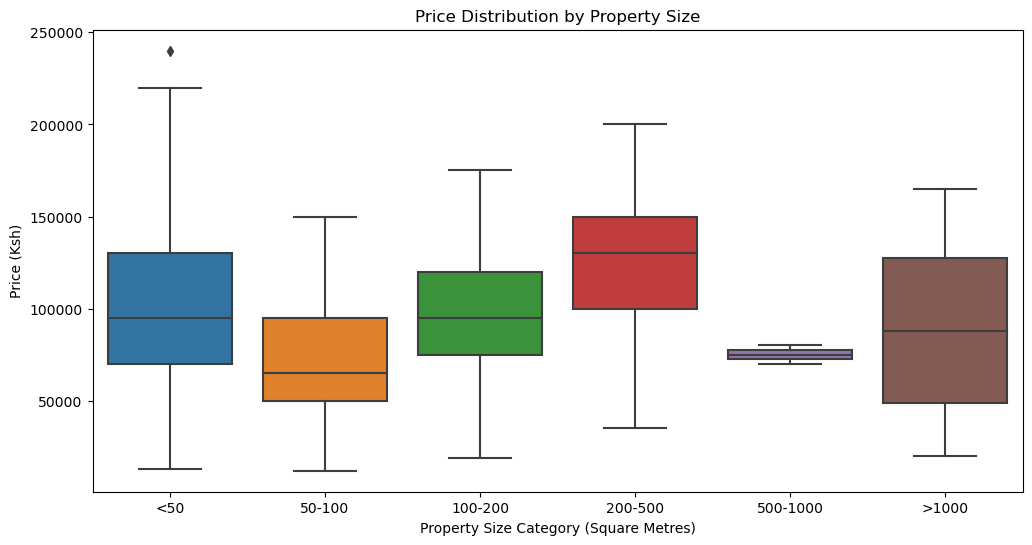

In [24]:
#  relationship between proterty size and price using Boxplot
df["Size_Category"] = pd.cut(df["sq_mtrs"], bins=[0, 50, 100, 200, 500, 1000, df["sq_mtrs"].max()], labels=["<50", "50-100", "100-200", "200-500", "500-1000", ">1000"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Size_Category", y="Price")

plt.xlabel("Property Size Category (Square Metres)")
plt.ylabel("Price (Ksh)")
plt.title("Price Distribution by Property Size")
plt.show()


In [25]:
#  relationship between proterty size and price using linear regression model
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data
X = df["sq_mtrs"].values.reshape(-1, 1)
y = df["Price"].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
df["Predicted_Price"] = model.predict(X)

# Print model coefficient
print(f"Price increases by {model.coef_[0]:,.2f} Ksh per square metre")


Price increases by -0.62 Ksh per square metre


In [26]:
# Calculate correlation matrix
correlation = df[["Bedrooms", "Bathrooms", "Price"]].corr()
print(correlation)


           Bedrooms  Bathrooms     Price
Bedrooms   1.000000   0.731506  0.352336
Bathrooms  0.731506   1.000000  0.440472
Price      0.352336   0.440472  1.000000
